# Derivatives of Acquisition Functions

In [1]:
import numpy as np
import pylab

%matplotlib inline

In [2]:
import bayesian_optimization.acquisition_functions
reload(bayesian_optimization.acquisition_functions)
UpperConfidenceBound = bayesian_optimization.acquisition_functions.UpperConfidenceBound
ProbabilityOfImprovement = bayesian_optimization.acquisition_functions.ProbabilityOfImprovement
ExpectedImprovement = bayesian_optimization.acquisition_functions.ExpectedImprovement

In [3]:
class GP_Proxy(object):
    
    def predict(self, x, return_std=True, eval_gradient=False):
        mean = np.exp(-x**2)
        MSE = (0.7*np.exp(-(x - 0.5)**2))**2
        if eval_gradient:
            d_mean, d_MSE = self.gradient(x)
            return mean, MSE, d_mean, d_MSE
        else:
            return mean, MSE
    
    def gradient(self, x):
        return -2*x*np.exp(-x**2), 2*(0.7*np.exp(-(x - 0.5)**2)) * (-2*(x-0.5)*0.7*np.exp(-(x - 0.5)**2))

In [4]:
model = GP_Proxy()

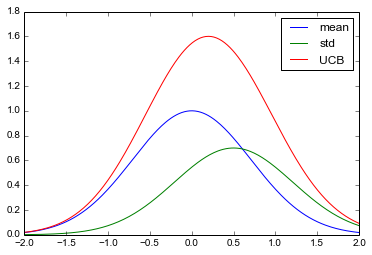

In [5]:
x = np.linspace(-2, 2, 250)

mu_x, MSE = model.predict(x, return_std=True)
sigma_x = np.sqrt(MSE)

pylab.plot(x, mu_x, label="mean")
pylab.plot(x, sigma_x, label="std")
pylab.plot(x, mu_x + 1.0*sigma_x, label="UCB")
pylab.legend()

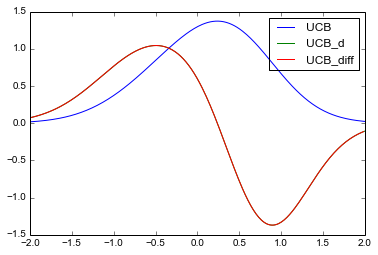

In [6]:
ucb = UpperConfidenceBound(model, kappa=1.0)
values, gradient = ucb(x, compute_gradient=True)

pylab.plot(x, values, label="UCB")
pylab.plot(x, gradient, label="UCB_d")
pylab.plot(x[1:-1], (values[2:] - values[:-2])/(x[2] - x[0]), label="UCB_diff")
pylab.legend()

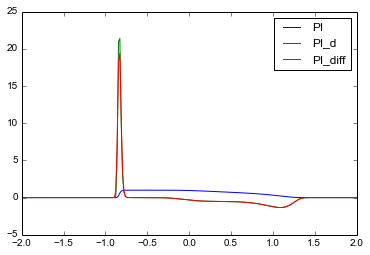

In [7]:
pi = ProbabilityOfImprovement(model, kappa=0.0)
values, gradient = pi(x, 0.5, compute_gradient=True)

pylab.plot(x, values, label="PI")
pylab.plot(x, gradient, label="PI_d")
pylab.plot(x[1:-1], (values[2:] - values[:-2])/(x[2] - x[0]), label="PI_diff")
pylab.legend()

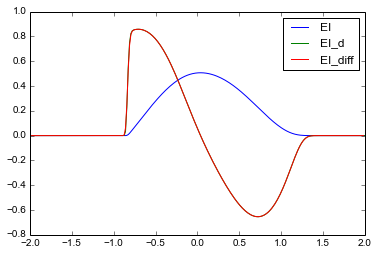

In [8]:
ei = ExpectedImprovement(model, kappa=0.0)
values, gradient = ei(x, 0.5, compute_gradient=True)

pylab.plot(x, values, label="EI")
pylab.plot(x, gradient, label="EI_d")
pylab.plot(x[1:-1], (values[2:] - values[:-2])/(x[2] - x[0]), label="EI_diff")
pylab.legend()